<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Осмотр-и-обработка-данных" data-toc-modified-id="Осмотр-и-обработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Осмотр и обработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Осмотр и обработка данных

- посмотрим наборы данных
- сделаем предварительные выводы
- поищем аномалии
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты

<font size="4"> 1.1 Посмотрим информацию о таблицах</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
# Подгрузим датасеты
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

<font size="4"> Посмотрим на таблицу с пользователями</font>

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


38 пользователей отказались от своих тарифов. Нужно привести даты к соответствующему типу.

<font size="4"> Посмотрим на таблицу со звонками</font>

In [5]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков нет. Нужно привести данные к соответствующим типам. Даты к датам, длительность звонка к целым.

<font size="4"> Посмотрим на таблицу с сообщениями</font>

In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Даты к датам. Пропусков нет.

<font size="4"> Посмотрим на таблицу с интернетом</font>

In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Странный столбец, который дублирует индексы. Опять даты. Пропусков нет.

<font size="4"> Посмотрим на таблицу с описанием тарифов</font>

In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Ну тут все хорошо, разве что колонку с названием тарифа переименовать, как в первой таблице, возможно понадобится.

<font size="4"> Вывод </font>
<font size="3">
- Таблица пользователей: привести даты к соответствующему типу    
- Таблица со звонками: привести даты к соответствующему типу, длительность звонка привести к целым, округлить значения вверх, 0 заменить на 1(звонки меньше минуты оператор считает за целую минуту)    
- Таблица с сообщениями: привести даты к соответствующему типу    
- Таблица с интернетом: привести даты к соответствующему типу    
- Таблица с описанием тарифов: переименовать столбец с названием тарифа</font>

<font size="4"> 1.2 Обработка данных</font>

<font size="3"> Таблица пользователей</font>

In [13]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Привели даты к соответствующему типу

<font size="3"> Таблица со звонками</font>

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['duration'] = calls['duration'].apply(np.ceil).astype('int').replace(0, 1)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


Даты привели в нужный формат, сменили тип данных у длительности звонка, округлили вверх, заменили нулевые значения

<font size="3"> Таблица с сообщениями</font>

In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Прекрасно, привели даты к нужному типу.

<font size="3"> Таблица с интернетом</font>

In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Даты в нужном типе

<font size="3"> Таблица с описанием тарифов</font>

In [18]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Изменили название столбца

<font size="4"> Вывод </font>
<font size="3">
- Привели данные к соответствующим типам исправили недостатки</font>

## Подготовка данных

<font size="4">Посчитайте для каждого пользователя:</font>

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

<font size="3"> Количество сделланых звонков и израсходованных минут по месяцам</font>

In [19]:
calls['month'] = calls['call_date'].dt.month_name()
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,July
1,1000_1,2018-08-17,1,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


In [20]:
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\

In [21]:
user_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,August,418,52
1,1000,December,341,46
2,1000,July,346,47
3,1000,June,187,43
4,1000,May,164,22


<font size="3"> Количество отправленных СМС по месяцам</font>

In [22]:
messages['month'] = messages['message_date'].dt.month_name()
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [23]:
user_messages.head()

,user_id,month,sms_total_in_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


<font size="3"> Объем израсходованного интернет-трафика по месяцам</font>

In [24]:
internet['month'] = internet['session_date'].dt.month_name()
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [25]:
user_internet.head()

,user_id,month,mb_total_in_month
0,1000,August,14055.93
1,1000,December,9817.61
2,1000,July,14003.64
3,1000,June,23233.77
4,1000,May,2253.49


<font size="3"> Помесечная выручка с каждого пользователя</font>

In [26]:
#объединим таблицы и найдем нужный показатель
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df = df.merge(users, on='user_id', how='left')
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [27]:
#посмотрим пустые значения после объединения
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [28]:
#заменим пропуски нулями, скорее всего люди не пишут СМС и не тратят МБ
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [29]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Прекрасно получилось

In [30]:
df.duplicated().sum()

0

Дубликатов нет

In [31]:
#найдем сколько стоят минуты смс и интернет
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_total_in_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [32]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [33]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']
df.sort_values(by='total_paid')

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
2167,1345,September,295.0,40.0,2.0,13934.49,31,NaT,Москва,Галина,...,smart,50,15360,500,550,200,3,3,0.0,550.0
1671,1268,May,13.0,2.0,4.0,1740.10,18,NaT,Москва,Трофим,...,smart,50,15360,500,550,200,3,3,0.0,550.0
689,1110,September,434.0,61.0,30.0,14214.83,26,NaT,Петрозаводск,Матвей,...,smart,50,15360,500,550,200,3,3,0.0,550.0
691,1111,November,354.0,53.0,2.0,11397.37,43,NaT,Казань,Милана,...,smart,50,15360,500,550,200,3,3,0.0,550.0
1667,1268,August,473.0,62.0,35.0,15018.35,18,NaT,Москва,Трофим,...,smart,50,15360,500,550,200,3,3,0.0,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,1286,December,751.0,95.0,68.0,35108.07,19,NaT,Москва,Рашид,...,smart,50,15360,500,550,200,3,3,4665.0,5215.0
3105,1486,November,788.0,108.0,96.0,36266.11,35,NaT,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,5086.0,5636.0
259,1042,December,755.0,121.0,75.0,37165.69,42,NaT,Хабаровск,Константин,...,smart,50,15360,500,550,200,3,3,5099.0,5649.0
1620,1261,December,1102.0,141.0,22.0,32650.91,46,NaT,Казань,Мадина,...,smart,50,15360,500,550,200,3,3,5184.0,5734.0


<font size="4"> Вывод </font>
<font size="3">
- Нашли требуемые показатели, собрали данные в одной таблице</font>

## Анализ данных



- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения

In [34]:
df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,3214.000000,3214.000000
mean,517.578718,1496.639079
std,742.005203,785.733791
min,0.000000,550.000000
25%,0.000000,712.000000
50%,123.000000,1585.000000
75%,854.750000,1950.000000
max,6204.000000,6754.000000


In [35]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

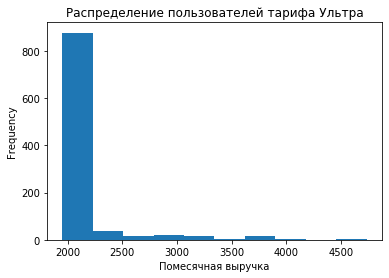

In [36]:
plt.title('Распределение пользователей тарифа Ультра')
plt.xlabel('Помесячная выручка')
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10)
plt.show()

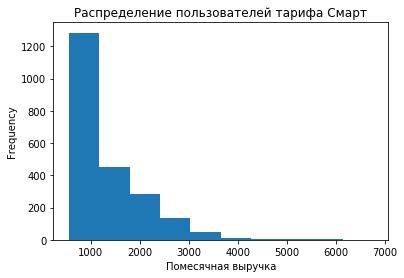

In [37]:
plt.title('Распределение пользователей тарифа Смарт')
plt.xlabel('Помесячная выручка')
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10)
plt.show()

In [38]:
df.groupby('tariff').agg({'total_paid':['median','mean','var','std']})

total_paid                                        
           median         mean            var         std
tariff                                                   
smart       984.0  1247.716913  632387.668031  795.228060
ultra      1950.0  2059.936041  126033.248954  355.011618

Ультру, видимо, в основном платят по тарифу и мелкими группами вылазят на каждую тысячу рублей. А у Смарта люди вылезают за абонентскую плату чаще

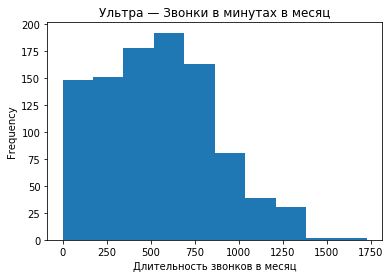

In [39]:
plt.title('Ультра — Звонки в минутах в месяц')
plt.xlabel('Длительность звонков в месяц')
df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)
plt.show()

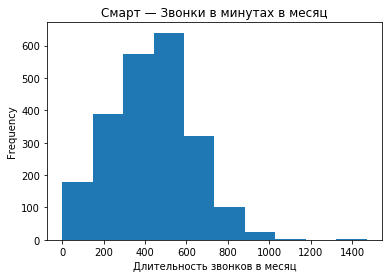

In [40]:
plt.title('Смарт — Звонки в минутах в месяц')
plt.xlabel('Длительность звонков в месяц')
df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10)
plt.show()

In [41]:
df.groupby('tariff').agg({'month_calls_duration':['median','mean','var','std']})

month_calls_duration                                       
                     median        mean            var         std
tariff                                                            
smart                 435.0  429.450875   37974.774628  194.871174
ultra                 532.0  540.779695  106105.726823  325.738740

На Смарте люди в месяц говорят около 450 минут, на Ультре 550 минут в месяц. То есть на Смарте люди подходят к краю своего тарифа, а на Ультре у них остается запас 2500 минут. Среднее и медиана лежат рядом и там и там — ничего необычного.

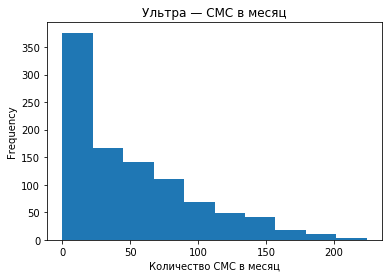

In [42]:
plt.title('Ультра — СМС в месяц')
plt.xlabel('Количество СМС в месяц')
df[df['tariff'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.show()

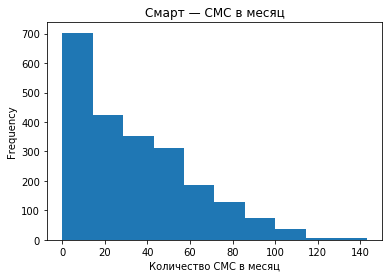

In [43]:
plt.title('Смарт — СМС в месяц')
plt.xlabel('Количество СМС в месяц')
df[df['tariff'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.show()

In [44]:
df.groupby('tariff').agg({'sms_total_in_month':['median','mean','var','std']})

sms_total_in_month                                   
                   median       mean          var        std
tariff                                                      
smart                28.0  33.384029   796.812958  28.227876
ultra                38.0  49.363452  2285.266143  47.804457

Распределения похожи, огромная часть пользователей которые вообще не отправляют СМС. На смарте есть пользователи которым не хватает стандартного кол-ва СМС, Пользователи ультра не расходуют даже 15% пакета смс.

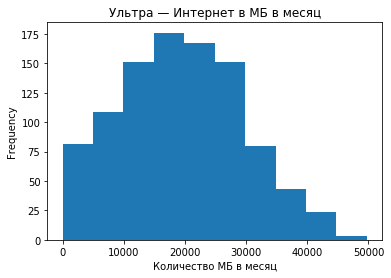

In [45]:
plt.title('Ультра — Интернет в МБ в месяц')
plt.xlabel('Количество МБ в месяц')
df[df['tariff'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.show()

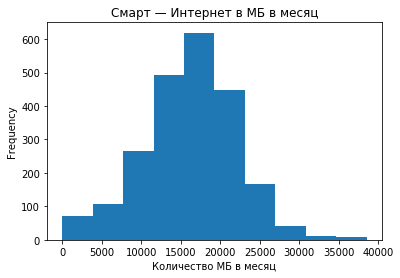

In [46]:
plt.title('Смарт — Интернет в МБ в месяц')
plt.xlabel('Количество МБ в месяц')
df[df['tariff'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.show()

In [47]:
df.groupby('tariff').agg({'mb_total_in_month':['median','mean','var','std']})

mb_total_in_month                                          
                  median          mean           var           std
tariff                                                            
smart           16506.84  16208.386990  3.446250e+07   5870.476681
ultra           19308.01  19468.805208  1.017510e+08  10087.170752

Среднее и медиана лежат рядом и там и там. На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб, но и разброс больше

<font size="4"> Вывод </font>
<font size="3">
- На тарифе смарт пользователи не укладываются в предложенные граници тарифа и переплачивают за минуты и МБ. На ультре наоборот платят за сам тариф больше, но не используют до конца предложенные им возможности. СМС большей частью никому не нужны.</font>

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

In [48]:
# Используем функцию для удаления выбросов, юзал в прошлых проектах
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы:

- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [49]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']


smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

alpha = 0.05

results = st.ttest_ind(ultra, smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.3151007710235154e-188
Отвергаем нулевую гипотезу


Разница не случайна, есть значимые различия между выборками

Гипотеза о равенстве средних двух генеральных совокупностей №2

Сформулируем гипотезы:

- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [50]:
moscow = df[df['city'] == 'Москва']
province = df[df['city'] != 'Москва']

moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

results = st.ttest_ind(moscow, province)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.30997014554948
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 30% такой результат может быть получен случайно. Значимых различий нет.

<font size="4"> Вывод </font>
<font size="3">
- Средняя выручка по тарифам различается
- Средгяя выручка от пользователей из Москвы, не отличается от других регионов.</font>

## Общий вывод

Люди на разных тарифах ведут себя по-разному, что наверно и хорошо. Так и должно работать сегментирование. Но и переплачивают, а это, особенно в Смарте, может приводить к разочарованию и оттоку.

- СМС-ки никому не нужны на обоих тарифах. Но если в Смарте люди близки к своим лимитам, то на Ультре остаются большие неизрасходованные "запасы" — возможно, имеет смысл подумать, как использовать эту, по сути, упущенную выгоду

- Деньги одинаково текут и из регионов и из Москвы, и вероятно это не связано с уровнем жизни, а с поведением пользователей

- Тарифы приносят разные деньги, значимые различия есть

Рекомендации оператору
- Исправить округление — нулевые минуты должны округляться до 1
- Не публиковать незашифрованные ФИО и города в одном наборе
- Подумать над оптимизацией тарифов